In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('application_data.csv')
col_desc = pd.read_csv('columns_description.csv')

In [6]:
col_desc.shape

(160, 5)

In [7]:
col_desc.iloc[:,[2,3]]

,Row,Description
0,SK_ID_CURR,ID of loan in our sample
1,TARGET,Target variable (1 - client with payment diffi...
2,NAME_CONTRACT_TYPE,Identification if loan is cash or revolving
3,CODE_GENDER,Gender of the client
4,FLAG_OWN_CAR,Flag if the client owns a car
...,...,...
155,DAYS_FIRST_DUE,Relative to application date of current applic...
156,DAYS_LAST_DUE_1ST_VERSION,Relative to application date of current applic...
157,DAYS_LAST_DUE,Relative to application date of current applic...
158,DAYS_TERMINATION,Relative to application date of current applic...


In [8]:
df.shape

(307511, 122)

In [9]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [11]:
df.dtypes

SK_ID_CURR                        int64
TARGET                            int64
NAME_CONTRACT_TYPE               object
CODE_GENDER                      object
FLAG_OWN_CAR                     object
FLAG_OWN_REALTY                  object
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
NAME_TYPE_SUITE                  object
NAME_INCOME_TYPE                 object
NAME_EDUCATION_TYPE              object
NAME_FAMILY_STATUS               object
NAME_HOUSING_TYPE                object
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
OWN_CAR_AGE                     float64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64


In [12]:
df.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

In [13]:
df_null = round(df.isnull().sum()*100/len(df),2)
df_null

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [14]:
df.isnull().sum()*100/len(df)

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [15]:
df_null = round(df.isnull().sum()*100/len(df),2)

In [16]:
df_null

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

In [17]:
#drop columns which have null values more than 30%

null_v = df_null[df_null >= 30]
null_v

OWN_CAR_AGE                     65.99
OCCUPATION_TYPE                 31.35
EXT_SOURCE_1                    56.38
APARTMENTS_AVG                  50.75
BASEMENTAREA_AVG                58.52
YEARS_BEGINEXPLUATATION_AVG     48.78
YEARS_BUILD_AVG                 66.50
COMMONAREA_AVG                  69.87
ELEVATORS_AVG                   53.30
ENTRANCES_AVG                   50.35
FLOORSMAX_AVG                   49.76
FLOORSMIN_AVG                   67.85
LANDAREA_AVG                    59.38
LIVINGAPARTMENTS_AVG            68.35
LIVINGAREA_AVG                  50.19
NONLIVINGAPARTMENTS_AVG         69.43
NONLIVINGAREA_AVG               55.18
APARTMENTS_MODE                 50.75
BASEMENTAREA_MODE               58.52
YEARS_BEGINEXPLUATATION_MODE    48.78
YEARS_BUILD_MODE                66.50
COMMONAREA_MODE                 69.87
ELEVATORS_MODE                  53.30
ENTRANCES_MODE                  50.35
FLOORSMAX_MODE                  49.76
FLOORSMIN_MODE                  67.85
LANDAREA_MOD

In [18]:
null_v.index

Index(['OWN_CAR_AGE', 'OCCUPATION_TYPE', 'EXT_SOURCE_1', 'APARTMENTS_AVG',
       'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG',
       'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
       'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG',
       'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG',
       'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE',
       'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE',
       'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
       'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE',
       'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI',
       'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI',
       'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI',
       'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI',
       'NONLIVINGAPARTMENTS_MEDI', 'NONLI

In [19]:
col = list(null_v.index)
col

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MO

In [20]:
df.drop(col, axis = 1, inplace = True)

In [21]:
df.isna().sum()

SK_ID_CURR                         0
TARGET                             0
NAME_CONTRACT_TYPE                 0
CODE_GENDER                        0
FLAG_OWN_CAR                       0
FLAG_OWN_REALTY                    0
CNT_CHILDREN                       0
AMT_INCOME_TOTAL                   0
AMT_CREDIT                         0
AMT_ANNUITY                       12
AMT_GOODS_PRICE                  278
NAME_TYPE_SUITE                 1292
NAME_INCOME_TYPE                   0
NAME_EDUCATION_TYPE                0
NAME_FAMILY_STATUS                 0
NAME_HOUSING_TYPE                  0
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
DAYS_EMPLOYED                      0
DAYS_REGISTRATION                  0
DAYS_ID_PUBLISH                    0
FLAG_MOBIL                         0
FLAG_EMP_PHONE                     0
FLAG_WORK_PHONE                    0
FLAG_CONT_MOBILE                   0
FLAG_PHONE                         0
FLAG_EMAIL                         0
C

In [22]:
df['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [23]:
1.687979 * 100000

168797.9

In [24]:
q3 = np.percentile(df['AMT_INCOME_TOTAL'],75)
q1 = np.percentile(df['AMT_INCOME_TOTAL'],25)

In [25]:
q3,q1

(202500.0, 112500.0)

In [26]:
iqr = q3 - q1
iqr

90000.0

In [27]:
ub = q3 + (1.5 * iqr)
lb = q1 - (1.5 * iqr)

In [28]:
ub

337500.0

In [29]:
lb

-22500.0

In [30]:
#filtering DATA WITHOUT OUTLIERS
df=df[(df['AMT_INCOME_TOTAL']<=ub) & (df['AMT_INCOME_TOTAL']>=lb)]

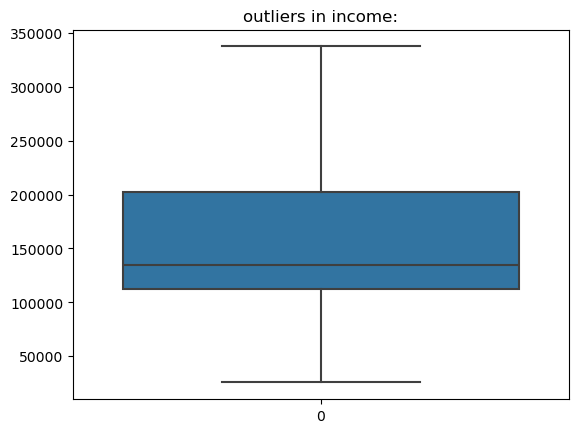

In [31]:
sns.boxplot(df['AMT_INCOME_TOTAL']);
plt.title('outliers in income:'); 

In [32]:
df['CNT_CHILDREN'].describe()

count    293476.000000
mean          0.414139
std           0.720161
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

In [33]:
q3=np.percentile(df['CNT_CHILDREN'],75)
q1=np.percentile(df['CNT_CHILDREN'],25)
q3,q1

(1.0, 0.0)

In [34]:
iqr=q3-q1
iqr

1.0

In [35]:
ub=q3+(1.5*iqr)
lb=q1-(1.5*iqr)

In [36]:
ub

2.5

In [37]:
lb

-1.5

In [38]:
df=df[(df['CNT_CHILDREN']<=ub)&(df['CNT_CHILDREN']>=lb)]

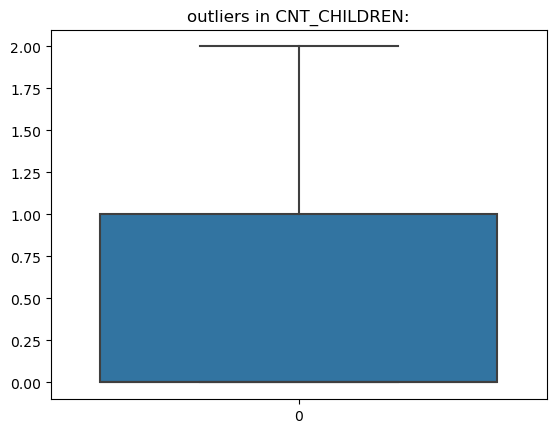

In [39]:
sns.boxplot(df['CNT_CHILDREN']);
plt.title('outliers in CNT_CHILDREN:'); 

In [40]:
def o1(data):
    q3=np.percentile(data,75)
    q1=np.percentile(data,25)
    q3,q1 
    iqr=q3-q1
    iqr
    ub=q3+(1.5*iqr)
    lb=q1-(1.5*iqr)

    return ub,lb

In [41]:
ub,lb=o1(df['AMT_INCOME_TOTAL'])

In [42]:
df=df[(df['AMT_INCOME_TOTAL']<=ub) & (df['AMT_INCOME_TOTAL']>=lb)]

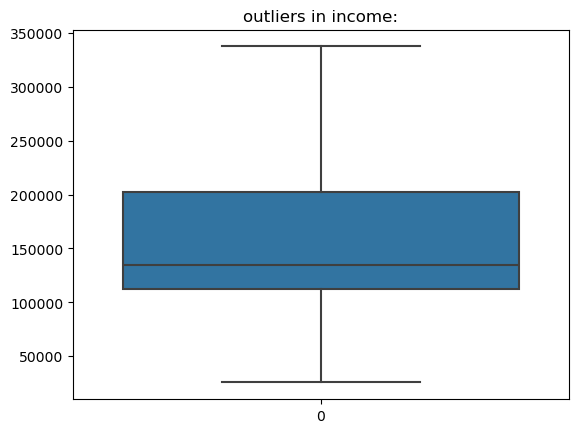

In [43]:
sns.boxplot(df['AMT_INCOME_TOTAL']);
plt.title('outliers in income:'); 